<h2>Data Cleaning and Determining DataFrame Shape</h2>

In [1]:
import pandas as pd
from matplotlib.pyplot import plot, show

app_data = pd.read_csv('apps.csv')
app_data = app_data.dropna()
app_data = app_data.drop_duplicates()
app_data = app_data.drop(columns=['Last_Updated', 'Android_Ver'])

app_data.shape

(8891, 10)

<h2>5 Highest Ratings</h2>

In [2]:
top_reviews = app_data.sort_values('Rating', ascending=False).head()
top_reviews

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
1573,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,$2.99,Everyone,Medical
1096,BG Guide,TRAVEL_AND_LOCAL,5.0,3,2.4,100,Free,0,Everyone,Travel & Local
1095,Morse Player,FAMILY,5.0,12,2.4,100,Paid,$1.99,Everyone,Education
1092,DG TV,NEWS_AND_MAGAZINES,5.0,3,5.7,100,Free,0,Everyone,News & Magazines


<h2>

<h2>Apps of Largest Size</h2>

In [3]:
largest_apps = app_data.sort_values('Size_MBs', ascending=False).head()
largest_apps

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8719,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,"5,000,000",Free,0,Everyone,Sports
9943,Miami crime simulator,GAME,4.0,254518,100.0,"10,000,000",Free,0,Mature 17+,Action
7926,Post Bank,FINANCE,4.5,60449,100.0,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.0,22435,100.0,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,"1,000,000",Paid,$0.99,Everyone 10+,Action


<h2>Most Reviewed Apps</h2>

In [4]:
most_reviews = app_data.sort_values('Reviews', ascending=False)[:10]
most_reviews = most_reviews.drop_duplicates('App')
most_reviews

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.3,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.5,"1,000,000,000",Free,0,Everyone,Communication
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10790,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,3.5,"1,000,000,000",Free,0,Everyone,Communication
10652,Clash of Clans,GAME,4.6,44893888,98.0,"100,000,000",Free,0,Everyone 10+,Strategy


<h2>Content Rating Chart</h2>

In [5]:
ratings = app_data['Content_Rating'].value_counts()
ratings


Content_Rating
Everyone           7094
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

<h2>Content Rating Donut Chart</h2>

In [6]:
import plotly.express as px

donut = px.pie(labels=ratings.index,
               values=ratings.values,
               title="Content Rating",
               names=ratings.index,
               hole=0.6)

donut.update_traces(textposition='inside',
                    textinfo='percent',
                    textfont_size=15)

donut.show()

<h2>Number of Apps with Over a Billion Downloads</h2>

In [7]:
app_data['Installs'] = app_data['Installs'].replace(',', '', regex=True)
installs = pd.to_numeric(app_data['Installs'])
app_data['Installs'] = installs
billion_installations = app_data[app_data.Installs >= 1000000000]['App']
billion_installations = billion_installations.drop_duplicates()

b_installs_count = billion_installations.count()
b_installs_count

20

<h2>10 Very Pricey Apps</h2>

In [8]:
app_data['Price'] = app_data['Price'].str.replace('$', '')
app_data['Price'] = app_data['Price'].astype(float)
expensive_apps = app_data.sort_values('Price', ascending=False)
apps_too_expensive = app_data[app_data.Price >= 250]
drop_indexes = list(apps_too_expensive.index)

mid_expensive_apps = expensive_apps.drop(index=drop_indexes)[:10]
mid_expensive_apps

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.0,6,1.3,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.2,134,1.8,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000,Paid,33.99,Everyone,Medical
504,AP Art History Flashcards,FAMILY,5.0,1,96.0,10,Paid,29.99,Mature 17+,Education
4264,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.0,50000,Paid,29.99,Everyone,Sports
2463,PTA Content Master,MEDICAL,4.2,64,41.0,1000,Paid,29.99,Everyone,Medical
2207,EMT PASS,MEDICAL,3.4,51,2.4,1000,Paid,29.99,Everyone,Medical
4774,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25.0,100000,Paid,24.99,Everyone,Medical
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25.0,100000,Paid,24.99,Everyone,Medical


<h2>10 Highest Paid Apps</h2>

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

estimated_revenue = app_data['Installs'] * app_data['Price']
app_data.insert(2, 'Estimated Revenue', estimated_revenue)
highest_paid_apps = app_data.sort_values('Estimated Revenue', ascending=False)


highest_paid_apps = highest_paid_apps.drop(index=drop_indexes)

highest_paid_apps = highest_paid_apps.drop_duplicates('App')[:10]
highest_paid_apps

,App,Category,Estimated Revenue,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9220,Minecraft,FAMILY,"69,900,000.00",4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure
8825,Hitman Sniper,GAME,"9,900,000.00",4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action
7151,Grand Theft Auto: San Andreas,GAME,"6,990,000.00",4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action
7977,Sleep as Android Unlock,LIFESTYLE,"5,990,000.00",4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle
7477,Facetune - For Free,PHOTOGRAPHY,"5,990,000.00",4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography
6594,DraStic DS Emulator,GAME,"4,990,000.00",4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action
6082,Weather Live,WEATHER,"2,995,000.00",4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather
7954,Bloons TD 5,FAMILY,"2,990,000.00",4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy
6746,Card Wars - Adventure Time,FAMILY,"2,990,000.00",4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure
7044,Tasker,TOOLS,"2,990,000.00",4.60,43045,3.40,1000000,Paid,2.99,Everyone,Tools


<h2>Bar Graph of Top App Categories</h2>

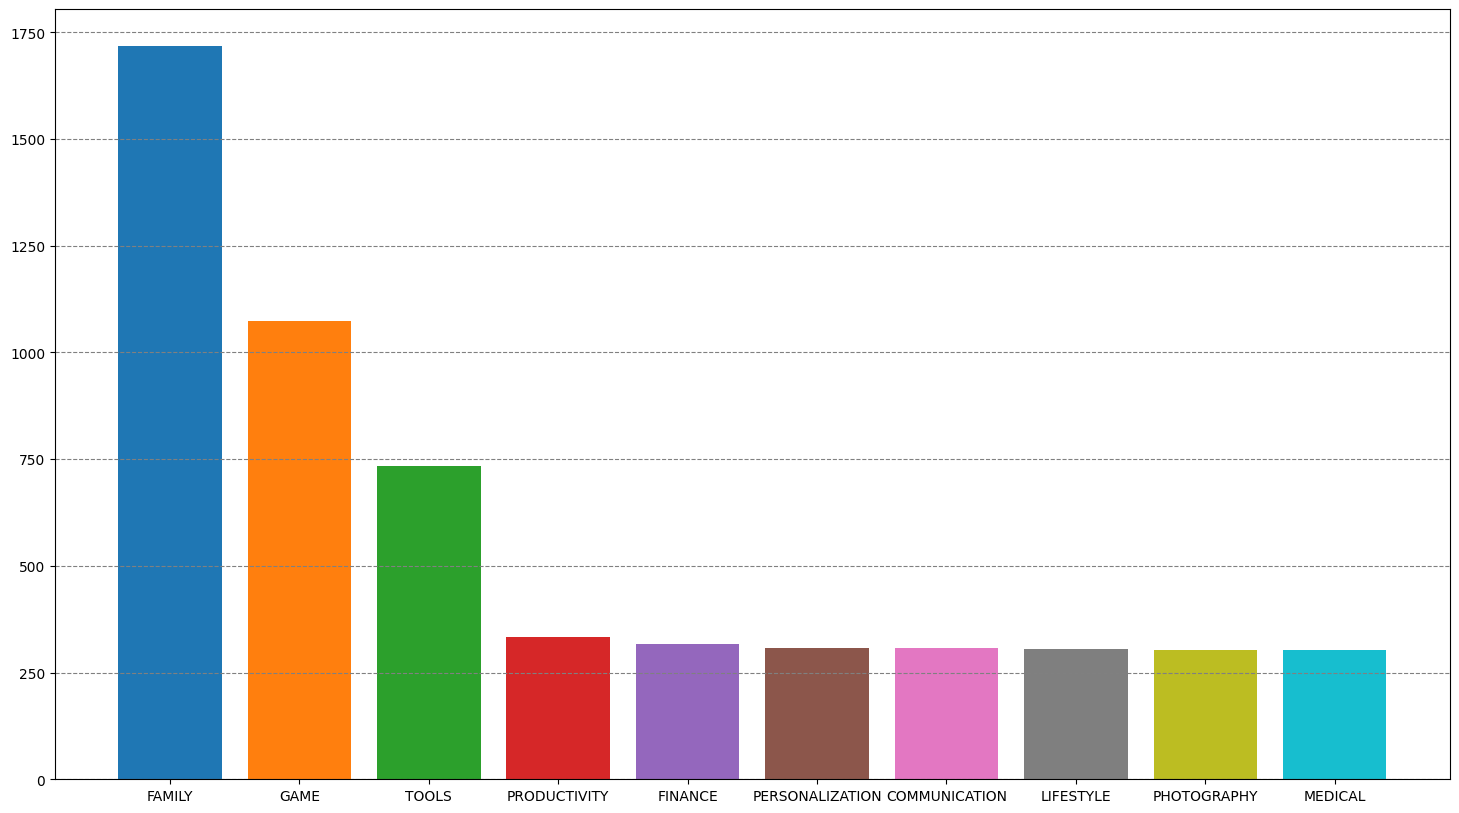

In [10]:
from matplotlib.pyplot import bar, figure, grid

figure(figsize=(18, 10))
grid(axis='y', color='grey', linestyle='--')

category_count = app_data['Category'].value_counts()[:10]
category_list = list(category_count.index)

for category in category_list:
  count = category_list.index(category)
  bar(x=category, height=category_count.iloc[count])

<h2>Top 10 App Categories Table</h2>

In [11]:
category_count

Category
FAMILY             1718
GAME               1074
TOOLS               734
PRODUCTIVITY        334
FINANCE             317
PERSONALIZATION     308
COMMUNICATION       307
LIFESTYLE           306
PHOTOGRAPHY         304
MEDICAL             302
Name: count, dtype: int64

<h2>Number of App Downloads by Category</h2>

In [13]:
import plotly.express as px

figure(figsize=(14, 12))

app_data = app_data.drop_duplicates('App')
categories = app_data.groupby('Category').sum('Installs')
categories = categories.sort_values('Installs')
category_downloads = categories['Installs']

my_labels = {'x': 'Downloads', 'y': 'Categories'}

h_bar = px.bar(x=category_downloads.values,
               y=category_downloads.index, orientation='h', labels=my_labels)
h_bar.show()

<Figure size 1400x1200 with 0 Axes>

<h2>Scatter Plot with Concentration Relative to Count and Color Relative to Downloads</h2>

In [14]:
from pandas import DataFrame

num_cate_installs = category_count = app_data['Category'].value_counts()
num_cate_installs = DataFrame(num_cate_installs)
num_cate_installs.insert(1, 'Installs', category_downloads)
num_cate_installs = num_cate_installs.sort_values('Installs', ascending=False)

scat_labels = {"y": "Downloads", "x": "Category Count"}

scatter = px.scatter(num_cate_installs, x=num_cate_installs['count'],
                     y=num_cate_installs['Installs'], labels=scat_labels,
                     color='Installs', size='count',
                     hover_data=['Installs'], hover_name=num_cate_installs.index)

scatter.update_layout(yaxis=dict(type='log'))

scatter.show()

<h2>Top 15 Categories by Number of Apps</h2>

In [15]:
genre_column = app_data['Genres'].str.split(';', expand=True).stack()
num_genres= genre_column.value_counts()[:15]

bar_labels = {'y': 'Number of Apps', 'x': 'Genre'}

genre_graph = px.bar(x=num_genres.index,
                     y=num_genres.values, labels=bar_labels,
                     color_continuous_scale='Burgyl',
                     color=num_genres.values)


genre_graph.update_coloraxes(showscale=False)

genre_graph.show()

<h2>Free vs. Paid Apps by Category</h2>

In [16]:
free_vs_paid = app_data.groupby(
    ['Category', 'Type'], as_index=False).agg({'App': pd.Series.count})


fvp_graph = px.bar(free_vs_paid,
                   x='Category', y='App',color='Type', barmode='group')

fvp_graph.update_xaxes(categoryorder='total descending', tickangle=90)

fvp_graph.update_layout(yaxis=dict(type='log', title='Installations'))

fvp_graph.show()

<h2>Box Plot of Free Apps vs. Paid Apps</h2>

In [17]:
my_box = px.box(app_data, x='Type', y='Installs', color='Type', notched=True, points='all')

my_box.update_layout(yaxis=dict(type='log'))

my_box.show()

<h2>App Revenue by Genre</h2>

In [18]:
paid_apps = app_data[app_data.Type == 'Paid']

paid_apps = paid_apps.drop(index=drop_indexes)

my_box = px.box(paid_apps, x='Category', y='Estimated Revenue')
my_box.update_layout(yaxis=dict(type='log'))
my_box = my_box.update_xaxes(tickangle=45, categoryorder='min ascending')
my_box.show()

<h2>Box Plot to Find Median App Price by Category</h2>

In [19]:
price_box = px.box(paid_apps, x='Category', y='Price')
price_box.update_layout(xaxis={'categoryorder':'max descending'}, yaxis=dict(type='log'))
price_box.show()